In [1]:
#Importing the required libraries
import gzip
import time
import os
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

# Clustering the KOS dataset

In [2]:
#Extracting the data
path="C:/"
arr_kos=[]
a=os.path.join(path,"Users/","rakti/","Downloads/","docword.kos.txt.gz")
with gzip.open(a, 'rb') as f:
    file_content = f.readlines()
for i in file_content:
    val=i.decode('UTF-8')
    arr_kos.append(val[:-1])


In [3]:
#Storing the data into a list
nnz_vector_kos=[]
for i in arr_kos[3:]:
    nnz_vector_kos.append(i.split(" "))
nnz_vector_kos=[[int(i),int(j),int(k)] for i,j,k in nnz_vector_kos]

In [4]:
#Creating the term-document matrix
docs=[i[0] for i in nnz_vector_kos]
wrd=[i[1] for i in nnz_vector_kos]
term_d=np.zeros((max(docs)+1,max(wrd)+1))
for i,j,k in nnz_vector_kos:
  term_d[i][j]=1
term_d=np.transpose(term_d)

In [5]:
#Creating the Jaccard matrix
jm = pairwise_distances(term_d, metric='jaccard')

c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [6]:
r=jm.shape

In [7]:
#Replacing the values with 1-value to obtain a Euclidean space to represent the vectors 
for i in range(r[0]):
  for j in range(r[1]):
    jm[i][j]=1-jm[i][j]

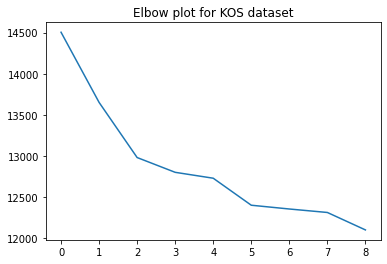

In [8]:
#Finding the optimal number of clusters
a=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=51).fit(jm)
  a.append(kmeans.inertia_)
plt.plot(a)
plt.title("Elbow plot for KOS dataset")
plt.show()

In [9]:
#Fitting the data points into clusters
t1=time.perf_counter()
kmeans=KMeans(n_clusters=3,random_state=42).fit(jm)
t2=time.perf_counter()-t1
t2

13.165719800000034

In [10]:

%load_ext memory_profiler

from memory_profiler import profile

%memit kmeans=KMeans(n_clusters=3,random_state=42).fit(jm)

peak memory: 1514.25 MiB, increment: 728.07 MiB


In [11]:
#Reducing the dimension of the dataset to visualise it in 3 dimensions
pca = PCA(n_components =3)
X2D = pca.fit_transform(jm)

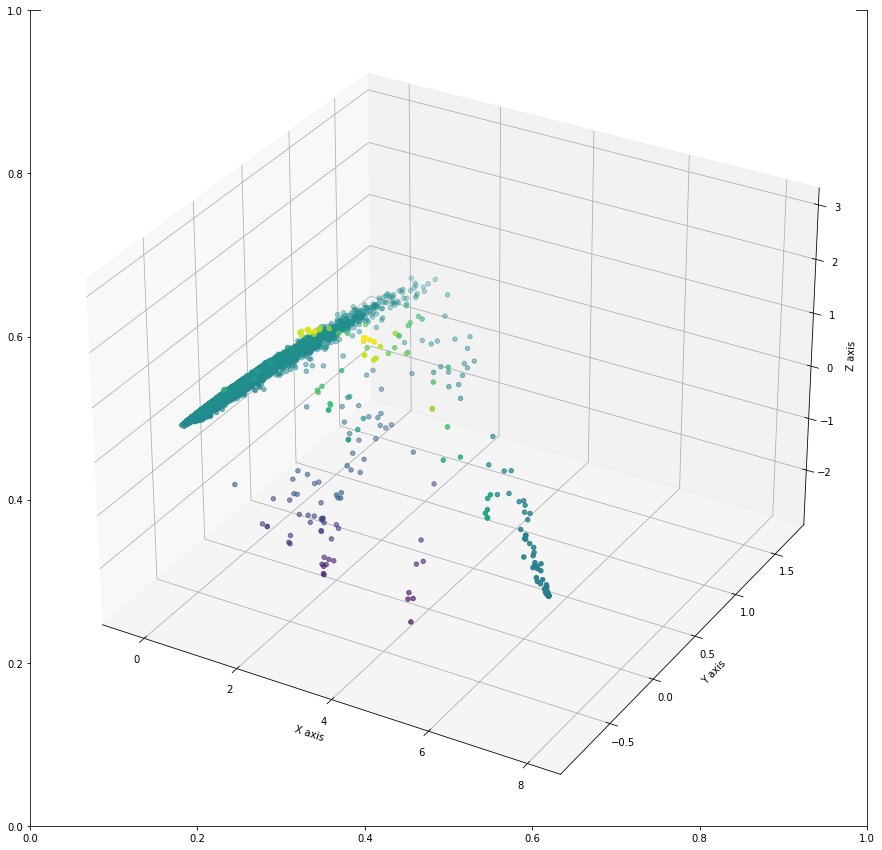

In [12]:
#Visualizing the data
fig,ax=plt.subplots(figsize=(15,15))
ax = plt.axes(projection='3d')
x=[i[0] for i in X2D]
y=[i[1] for i in X2D]
z=[i[2] for i in X2D]
ax.scatter3D(x, y, z, c=z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [13]:
#Accuracy metric 
from sklearn.metrics import davies_bouldin_score
labels = kmeans.fit_predict(jm)
davies_bouldin_score(jm,labels)

1.1931764085672916

# Clustering the NIPS dataset

In [14]:
arr_nips=[]
a=os.path.join(path,"Users/","rakti/","Downloads/","docword.nips.txt.gz")
with gzip.open(a, 'rb') as f:
    file_content = f.readlines()
for i in file_content:
    val=i.decode('UTF-8')
    arr_nips.append(val[:-1])

In [15]:
#Storing the data into a list
nnz_vector_nips=[]
for i in arr_nips[3:]:
    nnz_vector_nips.append(i.split(" "))
nnz_vector_nips=[[int(i),int(j),int(k)] for i,j,k in nnz_vector_nips]

In [16]:
#Creating the term-document matrix
docs=[i[0] for i in nnz_vector_nips]
wrd=[i[1] for i in nnz_vector_nips]
term_d=np.zeros((max(docs)+1,max(wrd)+1))
for i,j,k in nnz_vector_nips:
  term_d[i][j]=1
term_d=np.transpose(term_d)

In [17]:
#Creating the Jaccard matrix
jm = pairwise_distances(term_d, metric='jaccard')

c:\users\rakti\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [18]:
r=jm.shape

In [19]:
#Replacing the values with 1-value to obtain a Euclidean space to represent the vectors 
for i in range(r[0]):
  for j in range(r[1]):
    jm[i][j]=1-jm[i][j]

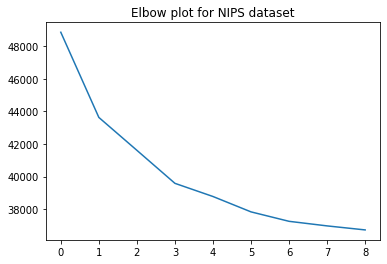

In [20]:
#Finding the optimal number of clusters
a=[]
for i in range(2,11):
  kmeans=KMeans(n_clusters=i,random_state=51).fit(jm)
  a.append(kmeans.inertia_)
plt.plot(a)
plt.title("Elbow plot for NIPS dataset")
plt.show()

In [21]:
#Fitting the data points into clusters
t1=time.perf_counter()
kmeans=KMeans(n_clusters=3,random_state=42).fit(jm)
t2=time.perf_counter()-t1
t2

36.31025270000009

In [22]:

%load_ext memory_profiler

from memory_profiler import profile

%memit kmeans=KMeans(n_clusters=3,random_state=42).fit(jm)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 3631.52 MiB, increment: 2052.18 MiB


In [23]:
#Reducing the dimension of the dataset to visualise it in 3 dimensions
pca = PCA(n_components =3)
X2D = pca.fit_transform(jm)

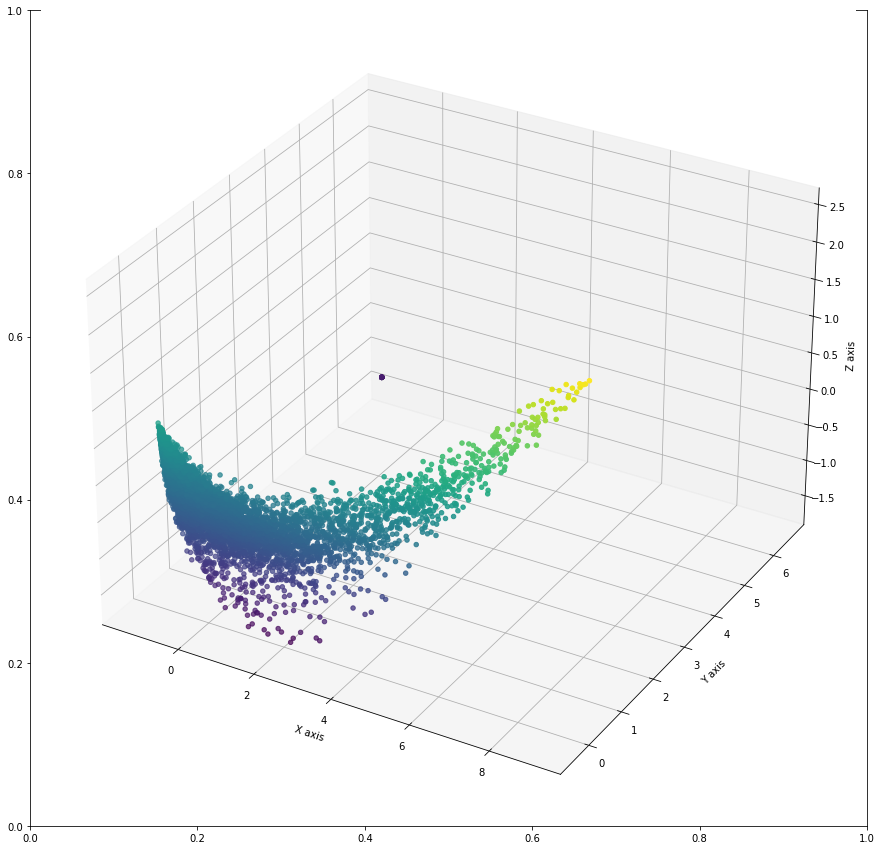

In [24]:
#Visualizing the data
fig,ax=plt.subplots(figsize=(15,15))
ax = plt.axes(projection='3d')
x=[i[0] for i in X2D]
y=[i[1] for i in X2D]
z=[i[2] for i in X2D]
ax.scatter3D(x, y, z, c=z)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


In [25]:
#Accuracy metric 
from sklearn.metrics import davies_bouldin_score
labels = kmeans.fit_predict(jm)
davies_bouldin_score(jm,labels)

1.4139015392890537